# Video Pre-Process

This contains our code to extract the WLASL100 and process the videos into numpy arrays and glosses into integer labels

* Filters out the WLASL100 videos
* WLASL1100_parsed_data.json: a json of video objects with elements
    * "gloss": a str of the signed word,
    * "label": an int label corresponding to the gloss,
    * "video_path": a str of the path of the video from current directory
    * "frame_start": an int of the frame where the signing starts,
    * "frame_end": an int of the frame where the signing ends,
    * "split": a str of the subset which is either "train" "val" or "test"


References:
* https://www.kaggle.com/code/abd0kamel/mutemotion-wlasl-translation-model
* https://openaccess.thecvf.com/content/WACV2022W/HADCV/papers/Bohacek_Sign_Pose-Based_Transformer_for_Word-Level_Sign_Language_Recognition_WACVW_2022_paper.pdf

### Import Data and Libraries
* Define base_path, the file path where the videos, landmarks, data files are stored
* Import existing label and json files describing the WLASL dataset

In [2]:
import os
import json
import shutil
import matplotlib.pyplot as plt
from IPython.display import FileLink

In [3]:
'''
Modify variables for respective computer
Rena: 'wlasl
Esther: '/Users/esther/Downloads/archive'
'''
base_path = 'wlasl'

'''
n determines number of glosses we wish to extract
'''
n = 100

In [4]:
# create a label dictionary that maps the gloss to the label integer 
# for the first n glosses

with open(f'{base_path}/wlasl_class_list.txt') as file:
  lines = file.readlines()

label_dict = {}
for i in range(n):
  index, label = lines[i].strip().split('\t')
  label_dict[label] = int(index)

len(label_dict.items())

100

In [5]:
with open(f'{base_path}/WLASL_v0.3.json', 'r') as json_file:
    all_data = json.load(json_file)

len(all_data)

2000

### Filter the Videos

* Define a new path for the video instances of the top n glosses
* Move videos to new path
* Defie a new json storing necessary metadata of video instances of the top n glosses

In [25]:
video_dir = f'{base_path}/videos'
filt_video_dir = f'{base_path}/videos{n}'
os.makedirs(filt_video_dir, exist_ok=True)

In [33]:
'''
A function for processing the video instances of the top n glosses
by moving them to a separate folder and redefining a dictionary

Params:
    n: an int of the number of glosses desired
Returns:
    a list of video objects
        data: a list
        data[i] = {'gloss': str, 'label': int, 'video_path': str, 'frame_start': int, 'frame_end': int, 'split': str} 
        data[i][field] = value

'''
def filter_videos(n):
    data = []
    # Iterate over first n glosses in all_data
    glosses = [entry['gloss'] for entry in all_data[:n]]
    all_instances = [entry['instances'] for entry in all_data[:n]]

    for i, gloss in enumerate(glosses):
        for instance in all_instances[i]:
            # Find the video
            video_id = instance['video_id']
            if os.path.exists(os.path.join(video_dir, f'{video_id}.mp4')):
                # Move video to new folder
                source_path = os.path.join(video_dir, f'{video_id}.mp4')
                video_path = shutil.move(source_path, filt_video_dir)
                # Extract all the metadata information provided and append to dictionary
                frame_start = instance['frame_start']
                frame_end = instance['frame_end']
                split = instance['split']
                data.append({
                    'gloss': gloss,
                    'label': label_dict[gloss],
                    'video_path': video_path,
                    'frame_start': frame_start,
                    'frame_end': frame_end,
                    'split': split
                })
                
    return data    


In [30]:
if not os.path.exists(f'{base_path}/WLASL{n}_parsed_data.json'):
    parsed_data = filter_videos(n)
    with open(f'{base_path}/WLASL{n}_parsed_data.json', 'w') as json_file:
        json.dump(parsed_data, json_file, indent=4)

FileLink(rf'{base_path}/WLASL{n}_parsed_data.json')

/Users/renabi/Academia/2024 Spring/Computer Vision/asl_cv/wlasl/WLASL100_parsed_data.json

### Visualize Our Data

* Plot of frequency of each gloss

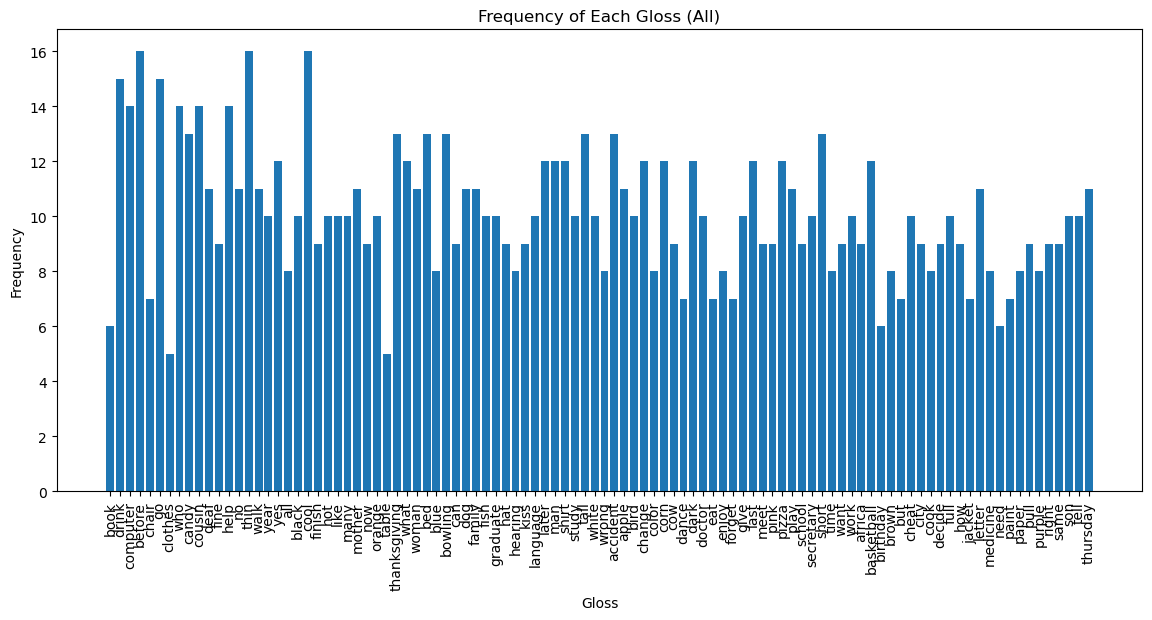

1013

In [50]:
from collections import Counter

# extract array of the gloss of each instance
data_glosses = [parsed_data[i]['gloss'] for i in range(len(parsed_data))]

# feed array through counter to determine frequencies and categories
gloss_counter = Counter(data_glosses)
glosses = list(gloss_counter.keys())
gloss_counts = list(gloss_counter.values())

# plot
plt.figure(figsize=(14, 6))
plt.bar(glosses, gloss_counts)
plt.title('Frequency of Each Gloss (All)')
plt.xlabel('Gloss')
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')

# Show the plot
plt.show()